<a href="https://colab.research.google.com/github/Erick-Rodriguez01/IA/blob/main/GridSearchOroErickRodriguez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ORO!!! Forecasting

In [115]:
## Importando las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
dataframeGold = pd.read_csv('gold_price_data.csv')
print(dataframeGold.columns)
dataframeGold.describe()

Index(['Date', 'Value'], dtype='object')


,Value
count,10787.000000
mean,653.596634
std,434.030848
min,35.100000
25%,349.200000
50%,409.350000
75%,1061.625000
max,1895.000000


In [102]:
print(dataframeGold.dtypes)
dataframeGold.head(10)

Date      object
Value    float64
dtype: object


,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4
5,1971-04-01,38.9
6,1971-07-01,40.1
7,1971-10-01,42.0
8,1972-01-03,43.5
9,1972-04-03,48.3


In [103]:
etiqueta = np.array(dataframeGold['Value'])[2:]
car_m1 = np.array(dataframeGold['Value'])[1:-1]
car_m2 = np.array(dataframeGold['Value'])[:-2]
print(len(etiqueta))
print(len(car_m1))
print(len(car_m2))

10785
10785
10785


In [104]:
## Agrupando los datos en un único Dataframe y exportándolo a un archivo CSV
dataset = pd.DataFrame({'Carac menos 2':car_m2, 'Carac menos 1':car_m1, 'Etiqueta':etiqueta})
dataset.to_csv('goldPriceArranged.csv')

In [105]:
## Pasando los datos a una matriz de tipo numpy
matrizDatos = dataset.to_numpy()
print(matrizDatos.shape)
#[row[1] for row in matrizDatos]


(10785, 3)


822
862
los mejores parametros son: (0.0, 1.0) y (0.5, 1.0) donde la funcion de costo retorno 40.80898264255911 y 80.63188843764489


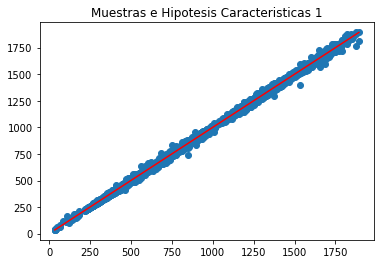

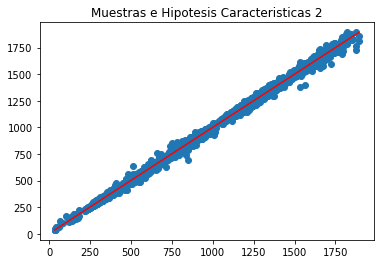

In [121]:
#funcion de costo
def funCosto(arr_1, arr_2):
    J = np.power(arr_1-arr_2,2)
    return np.sum(J)/(2*len(J))
#print (funCosto(etiqueta,etiqueta))

#GridSearch
# h(x) = T0 + T1*x
#1. Valores a T0 y T1
dict_resultados = dict()
dict_resultados1 = dict()
for T0 in np.arange(-10,10,5/10):
  for T1 in np.arange(-10,10,5/10):
# encontrar h(x)
   h_x= T0 + T1*car_m1
   h1_x= T0 + T1*car_m2
# evaluar funcion de costo
   dict_resultados[(T0,T1)]=funCosto(h_x,etiqueta)
   dict_resultados1[(T0,T1)]=funCosto(h1_x,etiqueta)
# Encontrar el menor
parameters = list(dict_resultados.keys())
parameters1 = list(dict_resultados1.keys())
#print(parameters)
costValues= np.array(list(dict_resultados.values()))
costValues1= np.array(list(dict_resultados1.values()))
#print minimo
indexMinCost= costValues.argmin()
indexMinCost1= costValues1.argmin()
print(indexMinCost)
print(indexMinCost1)
bestParameters = parameters[indexMinCost]
bestParameters1 = parameters1[indexMinCost1]
print("los mejores parametros son:", bestParameters, "y", bestParameters1, "donde la funcion de costo retorno", costValues[indexMinCost], "y", costValues1[indexMinCost1] )

plt.scatter(car_m1,etiqueta)
x= np.arange(car_m1.min(),car_m1.max(),(car_m1.max()-car_m1.min())/1000)
plt.plot(x,bestParameters[0]+bestParameters[1]*x,'r')
plt.title('Muestras e Hipotesis Caracteristicas 1')
plt.show()

plt.scatter(car_m2,etiqueta)
x1 =np.arange(car_m2.min(),car_m2.max(),(car_m2.max()-car_m2.min())/1000)
plt.plot(x1,bestParameters1[0]+bestParameters1[1]*x1,'r')
plt.title('Muestras e Hipotesis Caracteristicas 2')
plt.show()

